In [1]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

/home/aaron/miniconda3/envs/DPKS/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/aaron/miniconda3/envs/DPKS/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimizat

In [5]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv"
).filter()

In [6]:
quantified_data = (
    qm.normalize(
        method="mean",
        use_rt_sliding_window_filter=True,
        rt_unit="second",
        stride=5,
        minimum_data_points=200,
    )
    .quantify(
        method="maxlfq",
        threads=4,
        #top_n=5
    )
    .impute(
        method="uniform_percentile",
        percentile=0.05
    )
    .compare(
        method="linregress",
        min_samples_per_group=2,
        comparisons=[(2, 1)]
    )
)

Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice
Mean of empty slice


In [7]:
import xgboost

clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

In [8]:
quantified_data = quantified_data.explain(
    clf,
    comparisons=[(2, 1)],
    n_iterations=10,
    downsample_background=True
)

In [11]:
quantified_data = quantified_data.annotate()

In [12]:
quantified_data.row_annotations['-log(p)'] = - np.log(quantified_data.row_annotations['CorrectedPValue2-1'])

In [13]:
import seaborn as sns

In [14]:
import gseapy as gp

In [15]:
names = gp.get_library_name()

In [16]:
for name in names:

    print(name)

ARCHS4_Cell-lines
ARCHS4_IDG_Coexp
ARCHS4_Kinases_Coexp
ARCHS4_TFs_Coexp
ARCHS4_Tissues
Achilles_fitness_decrease
Achilles_fitness_increase
Aging_Perturbations_from_GEO_down
Aging_Perturbations_from_GEO_up
Allen_Brain_Atlas_10x_scRNA_2021
Allen_Brain_Atlas_down
Allen_Brain_Atlas_up
Azimuth_2023
Azimuth_Cell_Types_2021
BioCarta_2013
BioCarta_2015
BioCarta_2016
BioPlanet_2019
BioPlex_2017
CCLE_Proteomics_2020
CORUM
COVID-19_Related_Gene_Sets
COVID-19_Related_Gene_Sets_2021
Cancer_Cell_Line_Encyclopedia
CellMarker_Augmented_2021
ChEA_2013
ChEA_2015
ChEA_2016
ChEA_2022
Chromosome_Location
Chromosome_Location_hg19
ClinVar_2019
DSigDB
Data_Acquisition_Method_Most_Popular_Genes
DepMap_WG_CRISPR_Screens_Broad_CellLines_2019
DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
Descartes_Cell_Types_and_Tissue_2021
Diabetes_Perturbations_GEO_2022
DisGeNET
Disease_Perturbations_from_GEO_down
Disease_Perturbations_from_GEO_up
Disease_Signatures_from_GEO_down_2014
Disease_Signatures_from_GEO_up_2014
DrugM

In [17]:
enr = quantified_data.enrich(
    method="enrichr_overreptest",
    filter_pvalue=True,
    pvalue_column="CorrectedPValue2-1",
    pvalue_cutoff=0.1
)

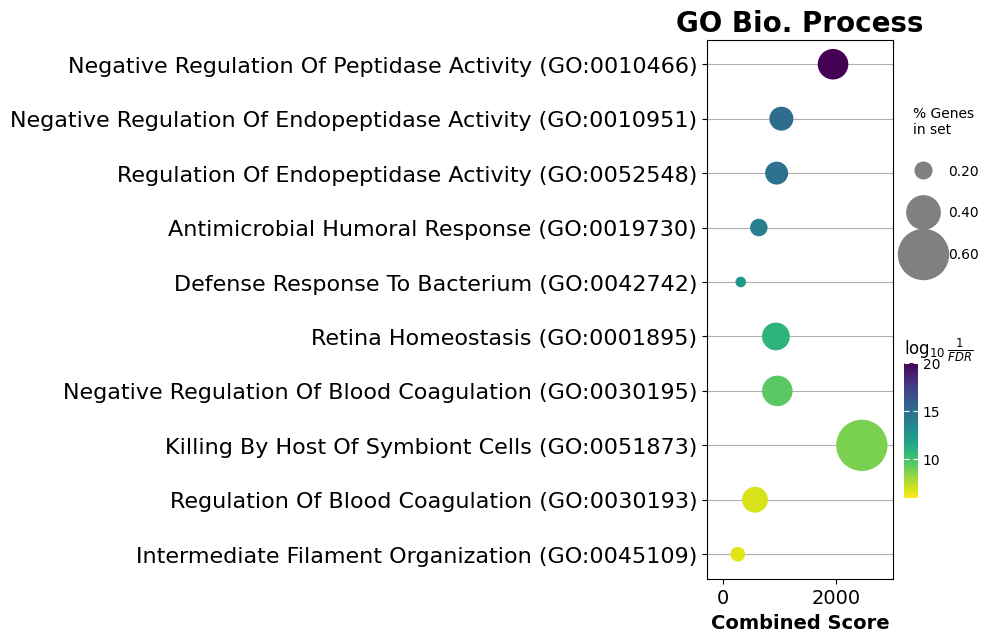

In [21]:
# simple plotting function
from gseapy import barplot, dotplot

ax = dotplot(enr.res2d, title='GO Bio. Process',cmap='viridis_r', size=10, figsize=(3,7))

In [23]:
enr = quantified_data.enrich(
    method="enrichr_overreptest",
    filter_shap=True,
    shap_column="MeanSHAP2-1",
    shap_cutoff=0.0
)

In [24]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Cholesterol Transport (GO:0030301),9/51,1.839068e-10,2.004584e-07,0,0,29.065068,651.539783,APOM;NPC2;AKR1C1;APOC1;APOA1;APOA4;CD36;APOB;CLU
1,GO_Biological_Process_2023,Defense Response To Bacterium (GO:0042742),14/204,6.913752e-10,3.767995e-07,0,0,10.271370,216.647211,CHGA;CRP;FCN2;IGHM;PGLYRP2;DEFA1;LYZ;MPO;RNASE...
2,GO_Biological_Process_2023,Antimicrobial Humoral Response (GO:0019730),10/100,5.559195e-09,2.019841e-06,0,0,15.137931,287.738956,IGHM;REG1A;DEFA1;PPBP;LYZ;PRSS2;S100A9;WFDC2;C...
3,GO_Biological_Process_2023,Defense Response To Gram-positive Bacterium (G...,8/85,3.152387e-07,8.590253e-05,0,0,13.971552,209.153241,CRP;CHGA;FCN2;PGLYRP2;DEFA1;LYZ;RNASE1;CAMP
4,GO_Biological_Process_2023,Cholesterol Efflux (GO:0033344),5/23,7.877641e-07,1.717326e-04,0,0,36.716667,516.018498,APOM;NPC2;APOC1;APOA1;APOA4
5,GO_Biological_Process_2023,Antibacterial Humoral Response (GO:0019731),6/49,2.088118e-06,3.658749e-04,0,0,18.544092,242.542772,IGHM;FGA;DEFA1;WFDC2;CAMP;JCHAIN
6,GO_Biological_Process_2023,Killing By Host Of Symbiont Cells (GO:0051873),4/13,2.349655e-06,3.658749e-04,0,0,58.384106,756.730520,CFHR2;CFHR5;DEFA1;CAMP
7,GO_Biological_Process_2023,High-Density Lipoprotein Particle Remodeling (...,4/15,4.431814e-06,6.038346e-04,0,0,47.763998,588.772547,APOM;APOC1;APOA1;APOA4
8,GO_Biological_Process_2023,Reverse Cholesterol Transport (GO:0043691),4/16,5.873490e-06,7.113449e-04,0,0,43.781457,527.350346,APOM;APOA1;APOA4;CLU
9,GO_Biological_Process_2023,Proteolysis (GO:0006508),12/330,1.051660e-05,1.146309e-03,0,0,5.152923,59.065663,FCN2;PRSS1;FCN3;CPB2;PROC;F9;CTRB2;CTSZ;PRSS2;...


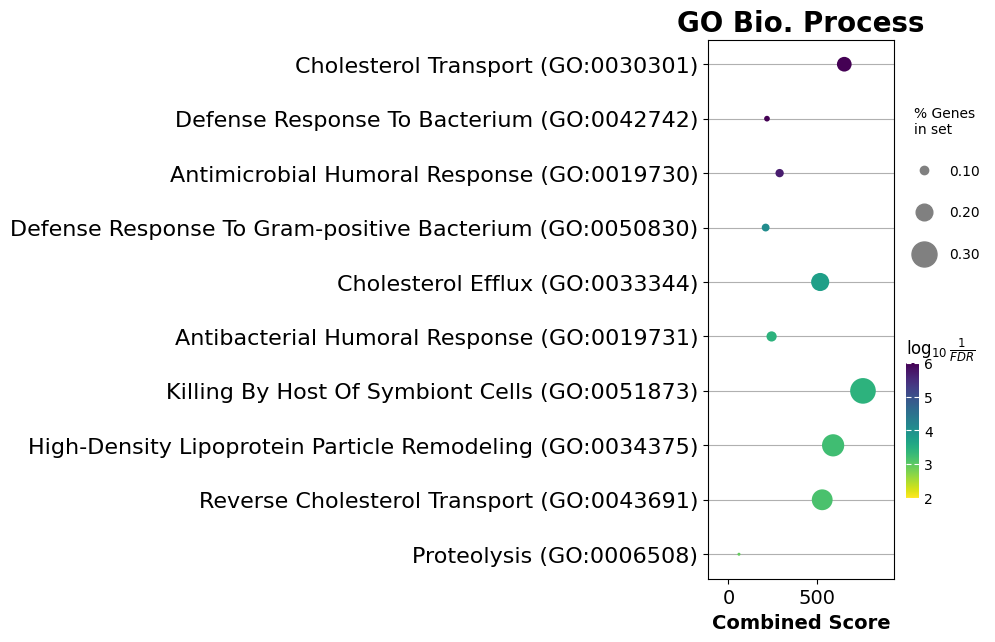

In [26]:
# simple plotting function
from gseapy import barplot, dotplot

ax = dotplot(enr.res2d, title='GO Bio. Process',cmap='viridis_r', size=10, figsize=(3,7))

In [27]:

background_genes = quantified_data.row_annotations['Gene'].to_list()

In [28]:
enr = quantified_data.enrich(
    method="enrichr_overreptest",
    libraries=['GO_Biological_Process_2023', 'KEGG_2021_Human', 'Reactome_2022'],
    organism="human",
    #background=background_genes,
    filter_pvalue=True,
    subset_library=True
)

In [30]:
enr = quantified_data.enrich(
    method="overreptest",
    libraries=['GO_Biological_Process_2023'],
    organism="human",
    #background=background_genes,
    filter_shap=True,
    subset_library=True
)

In [37]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(enr.res2d, top_term=10)



In [38]:
import networkx as nx

In [39]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])



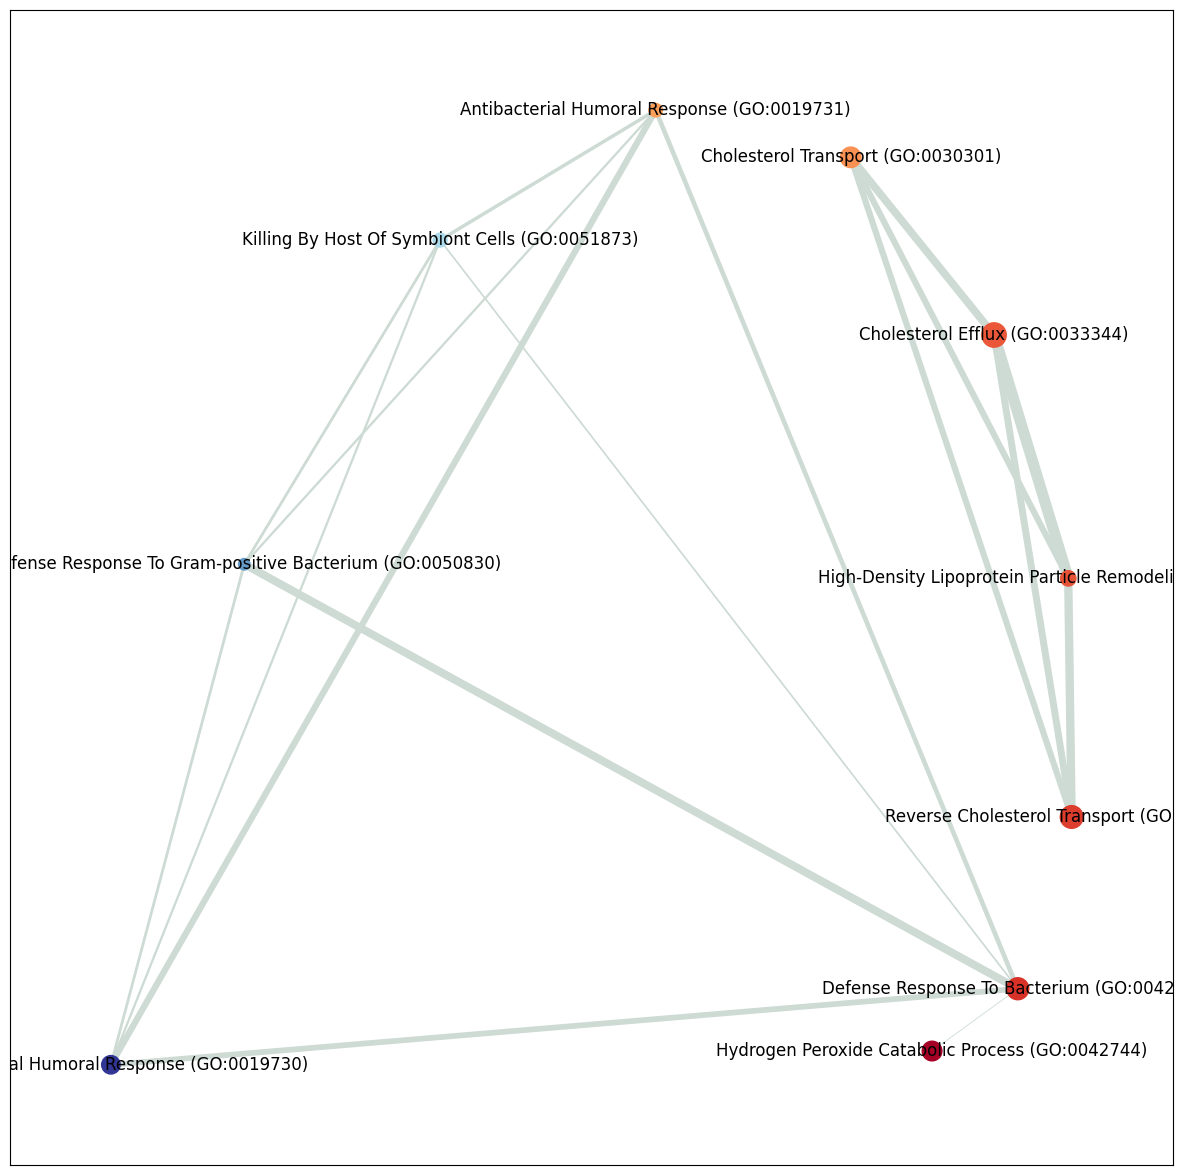

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.p_inv),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()



In [124]:
cyto = nx.cytoscape_data(G)